## 3 GeV to parquet

In [2]:
import uproot
import numpy as np
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq


In [ ]:
index = ['B_sig_K_dr', 'B_sig_K_dz', 'B_sig_CleoConeCS_3_ROE',
       'thrustAxisCosTheta', 'aplanarity', 'sphericity',
       'harmonicMomentThrust0', 'harmonicMomentThrust1',
       'harmonicMomentThrust2', 'harmonicMomentThrust3',
       'harmonicMomentThrust4', 'foxWolframR1', 'foxWolframR2', 'foxWolframR3',
       'foxWolframR4','B_sig_isSignalAcceptMissingNeutrino']

data0 = uproot.open("/ceph/aavocone/Data/processed_simulation_B_K_a_nunu_ma_0_005_GeV_100000_events_nobdtcut.root:tree_Bsig;1").arrays(index, library ="pd")
data3 = uproot.open("/ceph/aavocone/Data/processed_simulation_B_K_a_nunu_ma_3_GeV_100000_events_nobdtcut.root:tree_Bsig;1").arrays(index, library ="pd")
data4 = uproot.open("/ceph/aavocone/Data/processed_simulation_B_K_a_nunu_ma_4_6_GeV_100000_events_nobdtcut.root:tree_Bsig;1").arrays(index, library ="pd")
background = pq.read_table(f"/ceph/aavocone/Datasets/background.parquet")
background = background.to_pandas()

data = [data0,data3,data4]
names = ["0_large","3_large","4_large"]


for i in range(len(names)):
    sets =[data[i],background]
    data[i]["signal"]  = np.ones(len(data[i]))
    data[i].drop(data[i][data[i]["B_sig_isSignalAcceptMissingNeutrino"]==0.0].index, inplace = True)
    df = pd.concat(sets)
    df.drop("B_sig_isSignalAcceptMissingNeutrino", axis=1, inplace= True)
    table = pa.Table.from_pandas(df,nthreads = 1)
    pq.write_table(table, f"/ceph/aavocone/Datasets/{names[i]}.parquet")

In [6]:
names = ["0_large","3_large","4_large"]
df_sets = []
for index in names:
        print(f"Reading {index}...")
        df = pq.read_table(f"/ceph/aavocone/Datasets/{index}.parquet")
        df_sets.append(df.to_pandas())



Reading 0_large...
Reading 3_large...
Reading 4_large...


In [8]:
print(sum(df_sets[0].signal))
print(sum(df_sets[1].signal))
print(sum(df_sets[2].signal))


8553.0
20067.0
26090.0


In [9]:

test = df_sets[0][df_sets[0]["signal"]==1]
test.head()

,B_sig_K_dr,B_sig_K_dz,B_sig_CleoConeCS_3_ROE,thrustAxisCosTheta,aplanarity,sphericity,harmonicMomentThrust0,harmonicMomentThrust1,harmonicMomentThrust2,harmonicMomentThrust3,harmonicMomentThrust4,foxWolframR1,foxWolframR2,foxWolframR3,foxWolframR4,signal
5,0.006773,0.003621,1.713090,0.377378,0.032285,0.107447,0.647814,-0.195509,0.446371,-0.246102,0.365046,0.091932,0.484541,0.169890,0.361672,1.0
7,0.002183,-0.005876,0.726561,0.903454,0.031654,0.146229,0.706860,0.320837,0.320547,0.174323,0.139529,0.263373,0.247806,0.275316,0.310942,1.0
8,0.002455,0.039249,0.097220,0.324597,0.020838,0.220095,0.745554,-0.282015,0.394054,-0.165295,0.249441,0.145148,0.327637,0.112391,0.238278,1.0
19,0.003484,-0.009678,0.000000,0.287986,0.001195,0.104494,0.422246,-0.313265,0.317368,-0.204146,0.185054,0.555658,0.583358,0.269058,0.344590,1.0
21,0.002304,0.034644,0.792651,0.493575,0.091075,0.344535,0.654951,0.124511,0.232713,0.086429,-0.079434,0.059111,0.154656,0.178950,0.254449,1.0


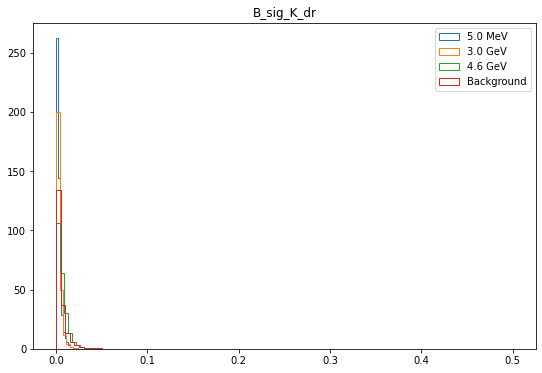

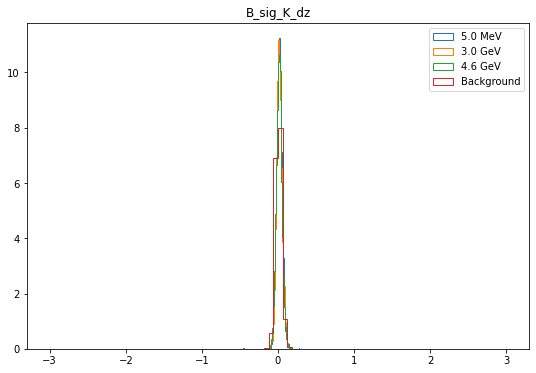

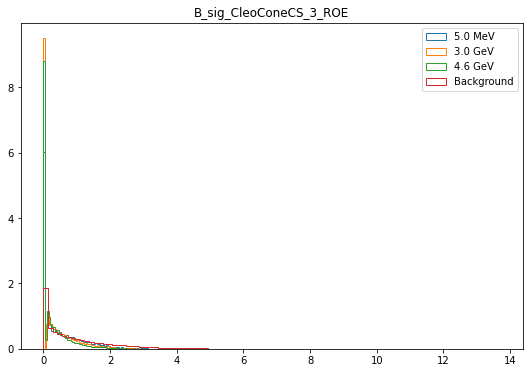

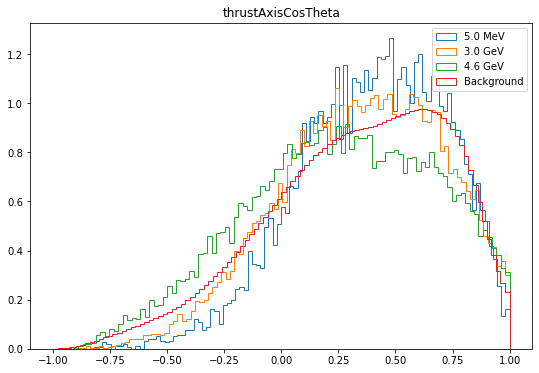

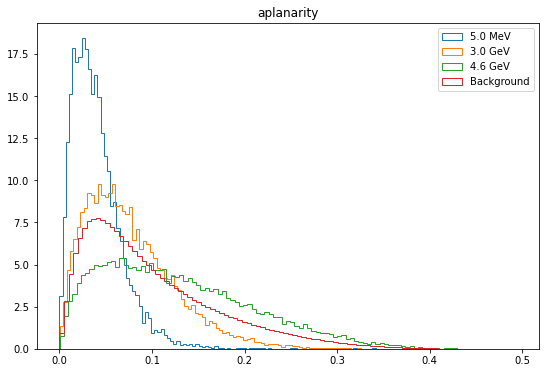

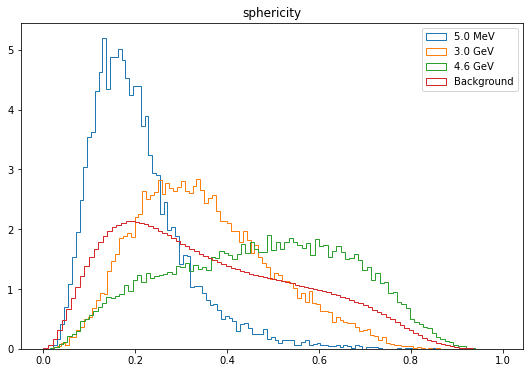

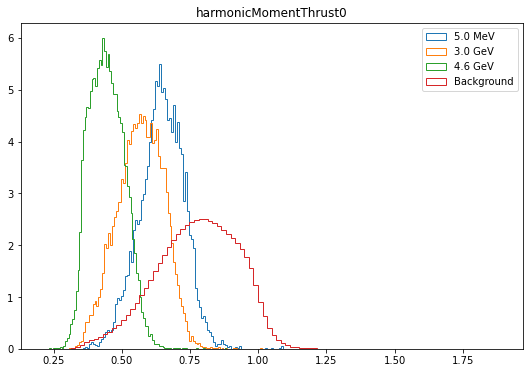

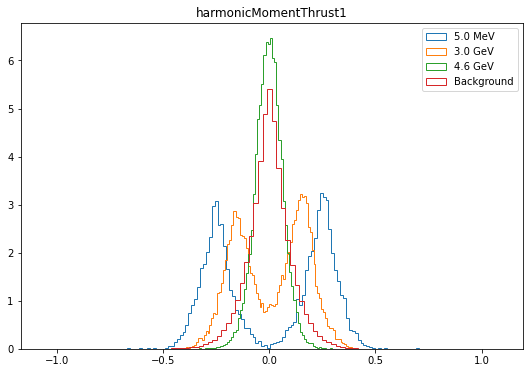

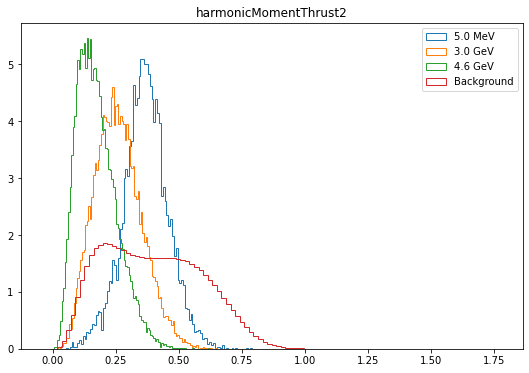

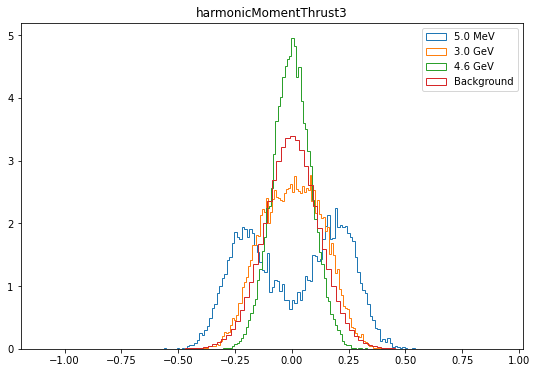

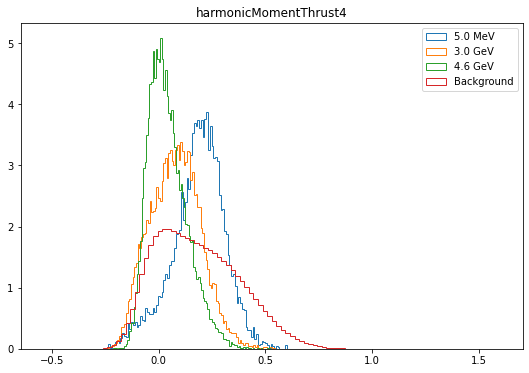

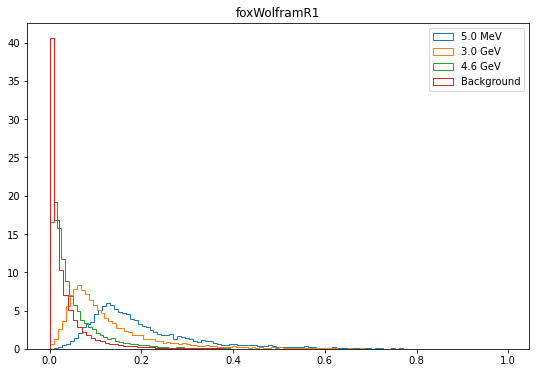

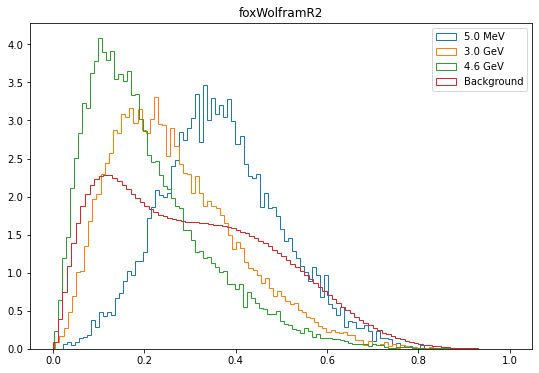

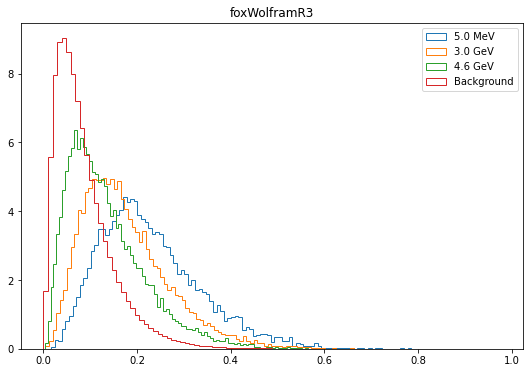

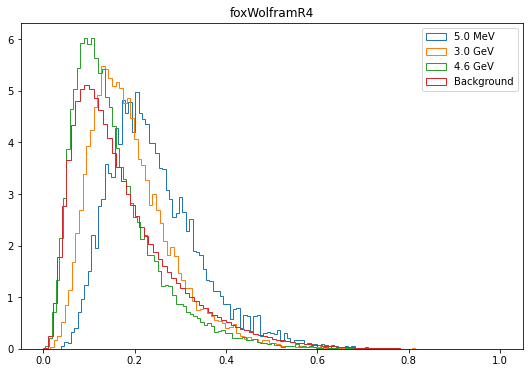

In [12]:
import matplotlib.pyplot as plt

index = ['B_sig_K_dr', 'B_sig_K_dz', 'B_sig_CleoConeCS_3_ROE',
       'thrustAxisCosTheta', 'aplanarity', 'sphericity',
       'harmonicMomentThrust0', 'harmonicMomentThrust1',
       'harmonicMomentThrust2', 'harmonicMomentThrust3',
       'harmonicMomentThrust4', 'foxWolframR1', 'foxWolframR2', 'foxWolframR3',
       'foxWolframR4']

for values in index:
    plt.figure(figsize=(9,6))
    plt.hist(df_sets[0][df_sets[0]["signal"]==1][values],bins=100, density=True, histtype="step", label = "5.0 MeV")
    plt.hist(df_sets[1][df_sets[1]["signal"]==1][values],bins=100, density=True, histtype="step", label = "3.0 GeV")
    plt.hist(df_sets[2][df_sets[2]["signal"]==1][values],bins=100, density=True, histtype="step", label = "4.6 GeV")
    plt.hist(df_sets[2][values],bins=100, density=True, histtype="step", label = "Background")
    plt.title(f"{values}")
    plt.legend()
    plt.show()